In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

Import csv data from https://data.sccer-jasm.ch/demand-hourly-profile-retrofits-cesar/jasm-demand-hourly-profile-retrofits-cesar-2020-09-17.zip
(https://www.sciencedirect.com/science/article/pii/S0378778819319486)

In [3]:
os.chdir('/home/MA')

In [4]:
load = pd.read_csv('Data/household_data_60min.csv')
load.head()

,Date/Time,Building_type,Construction_period,retrofit_scenario,Hot water + Space Heating demand [J](Hourly),Space Heating demand [J](Hourly),Hot water demand [J](Hourly),Space cooling demand [J](Hourly),Electricity demand [J](Hourly)
0,01/01 01:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
1,01/01 02:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
2,01/01 03:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
3,01/01 04:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
4,01/01 05:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41


In [5]:
load['Date/Time'] = pd.to_datetime(load['Date/Time'], format=' %m/%d  %H:%M:%S')

In [6]:
load = load.set_index([load['Date/Time'].dt.month, load['Date/Time'].dt.day, load['Date/Time'].dt.hour])

In [7]:
load.index.names = ["month", "day", "hour"]

In [8]:
load['Electricity demand [kWh](Hourly) '] = load['Electricity demand [J](Hourly) ']/3600000 

In [9]:
HW_boiler_eff = 1
HP_COP = 3.1
AC_EER = 8.5

In [10]:
load['Electricity for Space Heating [kWh]'] = load['Space Heating demand [J](Hourly)']/HP_COP/3600000

In [11]:
load['Electricity for Hot Water [kWh]'] = load['Hot water demand [J](Hourly)']/HW_boiler_eff/3600000

In [12]:
load['Electricity for Space Cooling [kWh]'] = load['Space cooling demand [J](Hourly)']/AC_EER/3600000

In [13]:
load['Total Electricity'] = load['Electricity demand [kWh](Hourly) '] + load['Electricity for Space Heating [kWh]'] + load['Electricity for Hot Water [kWh]'] + load['Electricity for Space Cooling [kWh]']

Let's also compare loads where no AC is installed, which is the current state of most Swiss homes

In [14]:
load['Total Electricity without AC'] = load['Electricity demand [kWh](Hourly) '] + load['Electricity for Space Heating [kWh]'] + load['Electricity for Hot Water [kWh]']

**Filter here for building type!**

In [15]:
load_SFH = load[load['Building_type']=='SFH']

In [16]:
load_SFH_modern = load_SFH.loc[load_SFH['Construction_period'] == '2011-2015']

In [17]:
len(load_SFH_modern)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


17520

In [18]:
load_SFH_modern_full_retrofit = load_SFH_modern.loc[load_SFH_modern['retrofit_scenario'] == 'Full retrofit']

In [19]:
load_SFH_modern_no_retrofit = load_SFH_modern.loc[load_SFH_modern['retrofit_scenario'] == 'No retrofit']

In [20]:
sum(load_SFH_modern_full_retrofit['Electricity demand [kWh](Hourly) '])

7481.558645269305

In [21]:
sum(load_SFH_modern_full_retrofit['Electricity for Space Heating [kWh]'])

596.8020614748244

In [22]:
sum(load_SFH_modern_full_retrofit['Electricity for Hot Water [kWh]'])

1451.18491354721

In [23]:
sum(load_SFH_modern_full_retrofit['Electricity for Space Cooling [kWh]'])

1331.1547920787038

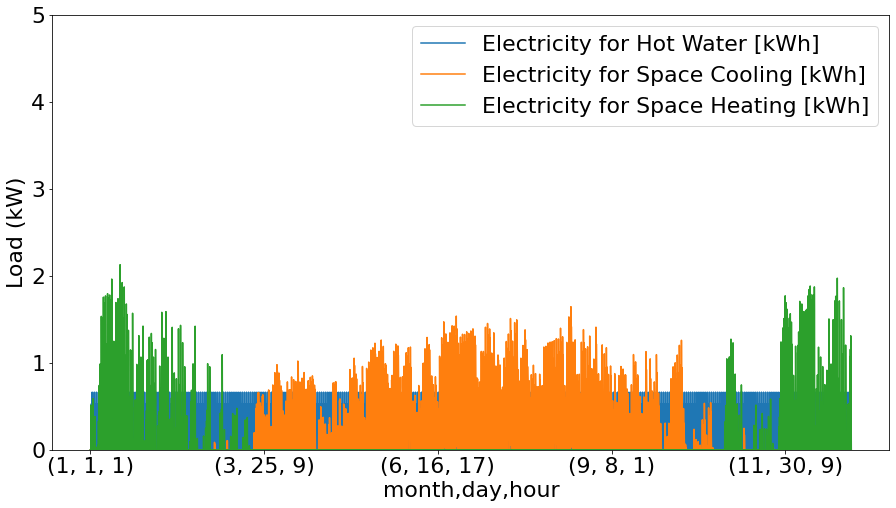

In [24]:
load_SFH_modern_full_retrofit[['Electricity for Hot Water [kWh]', 'Electricity for Space Cooling [kWh]', 'Electricity for Space Heating [kWh]']].plot(ylabel = 'Load (kW)', ylim = ([0, 5]));

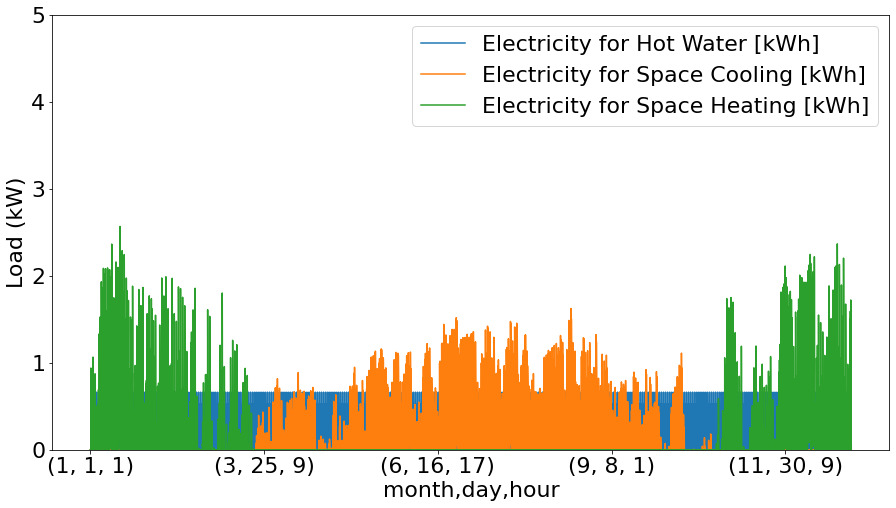

In [25]:
load_SFH_modern_no_retrofit[['Electricity for Hot Water [kWh]', 'Electricity for Space Cooling [kWh]', 'Electricity for Space Heating [kWh]']].plot(ylabel = 'Load (kW)', ylim = ([0, 5]));

In [32]:
load_SFH_modern_no_retrofit.to_pickle('Calculations/CH/load_CH_separated.pkl')

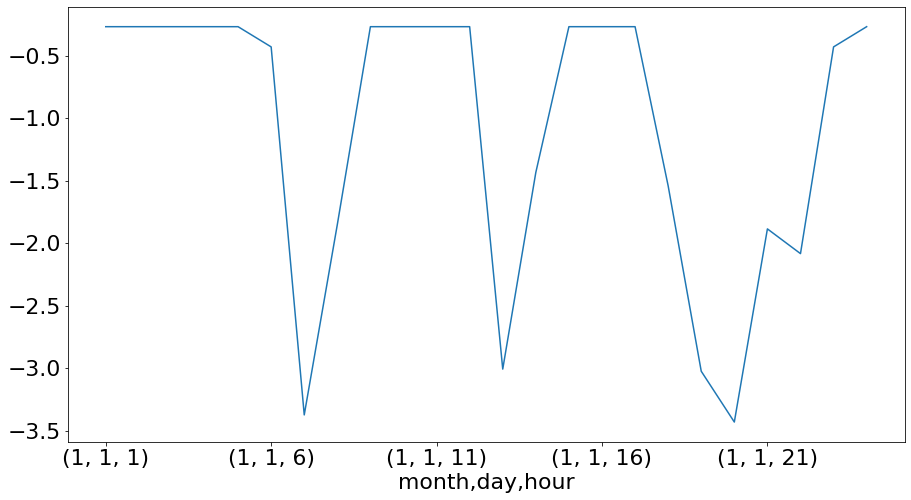

In [26]:
total_elec_load_inverted = -load_SFH_modern_full_retrofit['Total Electricity'] #invert
total_elec_load_inverted.head(24).plot();

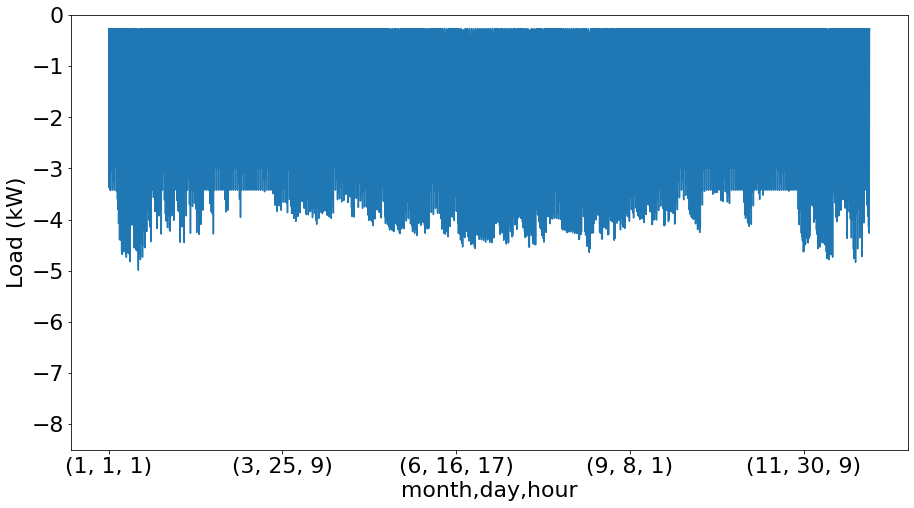

In [27]:
total_elec_load_inverted.plot(ylabel = 'Load (kW)', ylim = ([-8.5, 0]));

In [28]:
sum(load_SFH_modern_full_retrofit['Total Electricity'])

10860.700412370898

In [29]:
sum(load_SFH_modern_no_retrofit['Total Electricity'])

11111.537305326163

In [30]:
load_SFH_modern_full_retrofit['Total Electricity'].to_pickle('Calculations/CH/load_CH_modern_full_retrofit.pkl')

In [31]:
load_SFH_modern_full_retrofit['Total Electricity without AC'].to_pickle('Calculations/CH/load_CH_modern_full_retrofit_no_AC.pkl')